In [1]:
# Tener dependencias y declarar variables del dataset
import pandas
import matplotlib.pyplot as plt
variable = pandas.read_csv('fortune500.csv', na_values=0)

In [2]:
# Imprimir los primeros registros
variable.head()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


In [3]:
# Renombrar las columnas a nuestro gusto
variable.columns = ['year', 'rank', 'company', 'revenue', 'profit']

In [4]:
# Numero de registros en el dataset
len(variable)

25500

In [5]:
# Reviso los tipos de datos
variable.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit      object
dtype: object

In [6]:
variable.astype({
    'year': 'int',
    'rank': 'int',
    'company': 'str',
    'revenue': 'float',
    # 'profit': 'float'
    # Profit tiene problemas de datos
}).head()


,year,rank,company,revenue,profit
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


In [7]:
errorProfits = variable.profit.str.contains('[^0-9.-]')
rows = variable.loc[errorProfits]
rows.head()

,year,rank,company,revenue,profit
228,1955,229,Norton,135.0,N.A.
290,1955,291,Schlitz Brewing,100.0,N.A.
294,1955,295,Pacific Vegetable Oil,97.9,N.A.
296,1955,297,Liebmann Breweries,96.0,N.A.
352,1955,353,Minneapolis-Moline,77.4,N.A.


In [8]:
# Que otros problemas podemos tener?
set(rows.profit)

{'N.A.'}

In [9]:
# Veamos cuantos son en total
len(rows)

369

In [10]:
rows

,year,rank,company,revenue,profit
228,1955,229,Norton,135.0,N.A.
290,1955,291,Schlitz Brewing,100.0,N.A.
294,1955,295,Pacific Vegetable Oil,97.9,N.A.
296,1955,297,Liebmann Breweries,96.0,N.A.
352,1955,353,Minneapolis-Moline,77.4,N.A.
...,...,...,...,...,...
24242,2003,243,Farmland Industries,7580.2,N.A.
24296,2003,297,Land O'Lakes,5847.0,N.A.
24435,2003,436,Roundy's,3637.9,N.A.
24489,2003,490,Ace Hardware,3029.0,N.A.


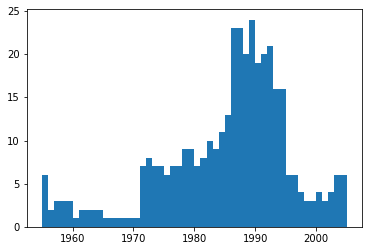

In [11]:
# Veamos la data para ver en donde localizamos los errores
plt.hist(rows.year, bins=rows.year)
plt.show()

In [12]:
# Eliminamos los registros inutiles de nuestro analisis
variable = variable.loc[variable.profit != 'N.A.']
variable.head()

,year,rank,company,revenue,profit
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


In [13]:
variable.astype({
    'year': 'int',
    'rank': 'int',
    'company': 'str',
    'revenue': 'float',
    'profit': 'float',
})
variable['profit'] = pandas.to_numeric(variable['profit'])
variable.dtypes


year         int64
rank         int64
company     object
revenue    float64
profit     float64
dtype: object

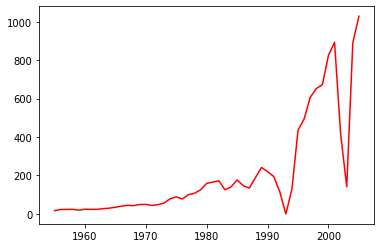

In [14]:
# variable.groupby('year')['revenue'].mean().head()
plt.plot(variable.groupby('year')['profit'].mean(), 'r')
plt.show()

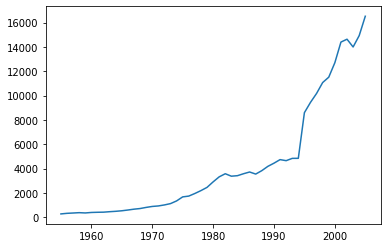

In [15]:
variable.groupby('year')['revenue'].head()
plt.plot(variable.groupby('year')['revenue'].mean())
plt.show()

In [16]:
npArrayRevenue = variable.groupby('year')['year','revenue'].mean().to_numpy()

<ipython-input-16-1f81081dd18f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  npArrayRevenue = variable.groupby('year')['year','revenue'].mean().to_numpy()


In [17]:
npArrayRevenueStd = variable.groupby('year')['revenue'].std().to_numpy()

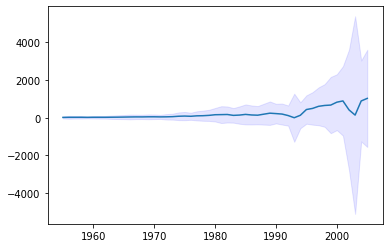

In [19]:
import numpy

group_year = variable.loc[:, ['year', 'revenue', 'profit']].groupby('year')
average = group_year.mean()

std = group_year.std()
x_std = std.index
y_std = list(std.profit)
x = average.index
y = list(average.profit)

plt.plot(x, y)

superiors = []
inferiors = []


for item in range(len(y)):
    sup_y = y[item] + y_std[item]
    superiors.append(sup_y)
    inf_y = y[item] - y_std[item]
    inferiors.append(inf_y)

plt.fill_between(x, inferiors, superiors, color="blue", alpha=0.1)

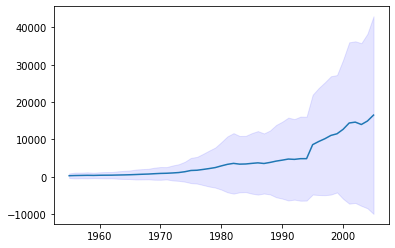

In [20]:
std = group_year.std()
x_std = std.index
y_std = list(std.revenue)
x = average.index
y = list(average.revenue)

plt.plot(x, y)

superiors = []
inferiors = []


for item in range(len(y)):
    sup_y = y[item] + y_std[item]
    superiors.append(sup_y)
    inf_y = y[item] - y_std[item]
    inferiors.append(inf_y)

plt.fill_between(x, inferiors, superiors, color="blue", alpha=0.1)